In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

In [9]:
directory="dataset/train/"
classses=os.listdir(directory)

In [10]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

dataset/train/COVID19
dataset/train/NORMAL
dataset/train/OTHERS
dataset/train/PNEUMONIA
dataset/train/TUBERCOLOSIS


In [11]:
import random
random.shuffle(data1)

In [12]:
len(data1)

7912

In [13]:
classses

['COVID19', 'NORMAL', 'OTHERS', 'PNEUMONIA', 'TUBERCOLOSIS']

In [14]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [15]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [18]:
progess = model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test))

Epoch 1/5
198/198 [==============================] - 3675s 19s/step - loss: 0.2538 - accuracy: 0.9357 - val_loss: 0.0052 - val_accuracy: 0.9987
Epoch 2/5
198/198 [==============================] - 3512s 18s/step - loss: 0.0596 - accuracy: 0.9836 - val_loss: 0.0088 - val_accuracy: 0.9962
Epoch 3/5
198/198 [==============================] - 3820s 19s/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 6.7400e-04 - val_accuracy: 1.0000
Epoch 4/5
198/198 [==============================] - 3567s 18s/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 6.0254e-04 - val_accuracy: 0.9994
Epoch 5/5
198/198 [==============================] - 3576s 18s/step - loss: 9.4861e-04 - accuracy: 0.9997 - val_loss: 2.9413e-04 - val_accuracy: 1.0000


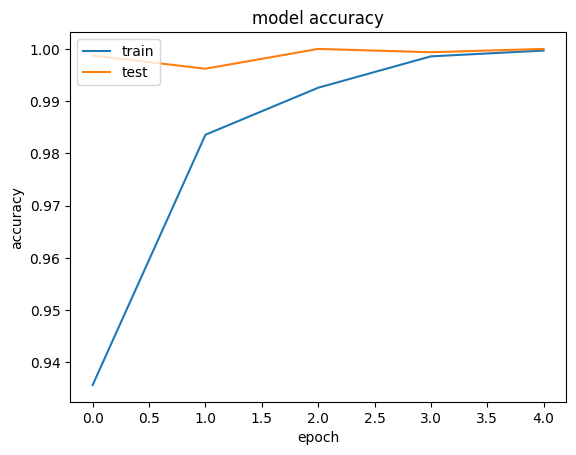

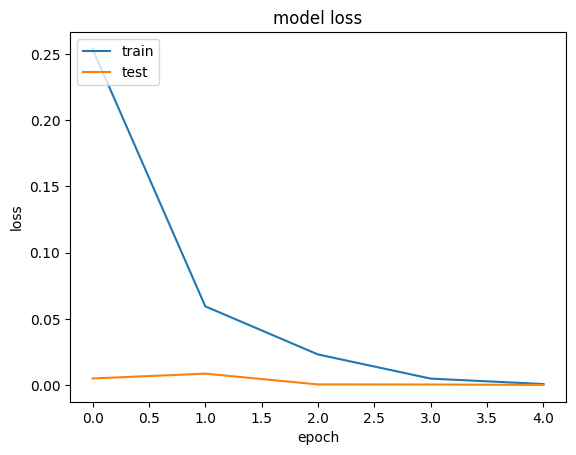

In [19]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [21]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00       420
      NORMAL       1.00      1.00      1.00       451
      OTHERS       1.00      1.00      1.00       145
   PNEUMONIA       1.00      1.00      1.00       424
TUBERCOLOSIS       1.00      1.00      1.00       143

    accuracy                           1.00      1583
   macro avg       1.00      1.00      1.00      1583
weighted avg       1.00      1.00      1.00      1583



<AxesSubplot:>

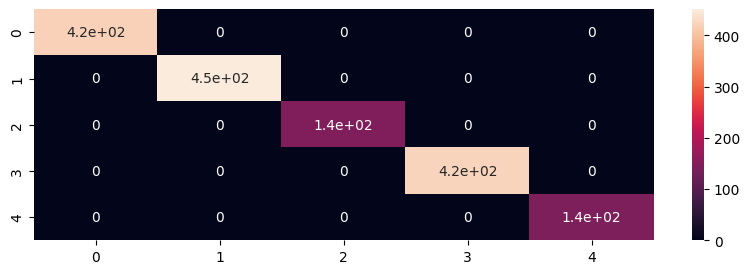

In [23]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [24]:
model.save("VGGSKin.hp5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: VGGSKin.hp5\assets


In [25]:
import os

In [26]:
for i in os.listdir("testing/"):
    print(i)
    
    from tensorflow import keras
    model = keras.models.load_model('VGGSKin.hp5')
    from keras.preprocessing import image
    image_size=224
    #img = cv2.imread(path1+"//"+i)
    path="testing/"+i
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    print(type(x))
    img_4d=x.reshape(1,224,224,3)
    #img_4d=img_4d/255
    model = keras.models.load_model('VGGSKin.hp5')
    predictions = model.predict(img_4d)
    print(predictions[0])
    new_pred=np.argmax(predictions[0])
    print(new_pred)
#     ['COVID19', 'NORMAL', 'OTHERS', 'PNEUMONIA', 'TUBERCOLOSIS']
    dict1={0:'COVID19',1:'NORMAL',2:'OTHERS',3:'PNEUMONIA',4:'TUBERCOLOSIS'}
    list1=["COVID19","NORMAL","OTHERS","PNEUMONIA","TUBERCOLOSIS"]
    a=dict1[new_pred]
    
    print(str(a)+" Detected in Image")
    print("-----------------------------------------------")
    #break

5.jpg


Using TensorFlow backend.


<class 'numpy.ndarray'>
[8.5398576e-16 2.0021619e-18 1.0000000e+00 3.4958445e-16 1.9900417e-16]
2
OTHERS Detected in Image
-----------------------------------------------
a.png
<class 'numpy.ndarray'>
[6.0419811e-09 1.3267377e-10 1.0000000e+00 9.4714514e-10 6.2093226e-11]
2
OTHERS Detected in Image
-----------------------------------------------
covid.jpg
<class 'numpy.ndarray'>
[9.9999988e-01 1.6732857e-08 6.5007484e-08 2.6204050e-08 7.1757822e-09]
0
COVID19 Detected in Image
-----------------------------------------------
covid2.JPG
<class 'numpy.ndarray'>
[1.0000000e+00 7.3375767e-13 2.5967902e-13 1.0413430e-13 1.8320609e-16]
0
COVID19 Detected in Image
-----------------------------------------------
norm.png
<class 'numpy.ndarray'>
[4.4463565e-29 1.0000000e+00 1.2402667e-26 1.9342150e-24 1.1622527e-30]
1
NORMAL Detected in Image
-----------------------------------------------
norm2.png
<class 'numpy.ndarray'>
[3.3768638e-19 1.0000000e+00 8.1642139e-18 6.8867426e-18 1.8803162e-21]
1

In [27]:
# pip install Pillow

In [7]:
# from PIL import Image
# import os

# def resize_images(input_folder, output_folder, target_size):
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     for filename in os.listdir(input_folder):
#         if filename.endswith(('.jpg', '.png', '.jpeg')):  # Add more supported extensions if needed
#             image_path = os.path.join(input_folder, filename)
#             img = Image.open(image_path)
            
#             # Resize the image while maintaining the aspect ratio
#             img.thumbnail(target_size)

#             # Add padding to make the image exactly 512x512
#             background = Image.new('RGB', target_size, (255, 255, 255))
#             background.paste(img, ((target_size[0] - img.size[0]) // 2, (target_size[1] - img.size[1]) // 2))

#             output_path = os.path.join(output_folder, filename)
#             background.save(output_path)

# input_folder = 'dataset/train/OTHERS'  # Replace with the path to your input folder
# output_folder = 'dataset/train/newfolder'  # Replace with the path to your output folder
# target_size = (512, 512)

# resize_images(input_folder, output_folder, target_size)
